# Figure 2


In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sp_stats
import matplotlib.pyplot as plt
import seaborn as sns


## Figure 2c


### Load Source Data


In [ ]:
data_fig2c_auc = pd.read_csv("../source-data/data-fig2c-auc.csv")

### Performance Distribution per Model


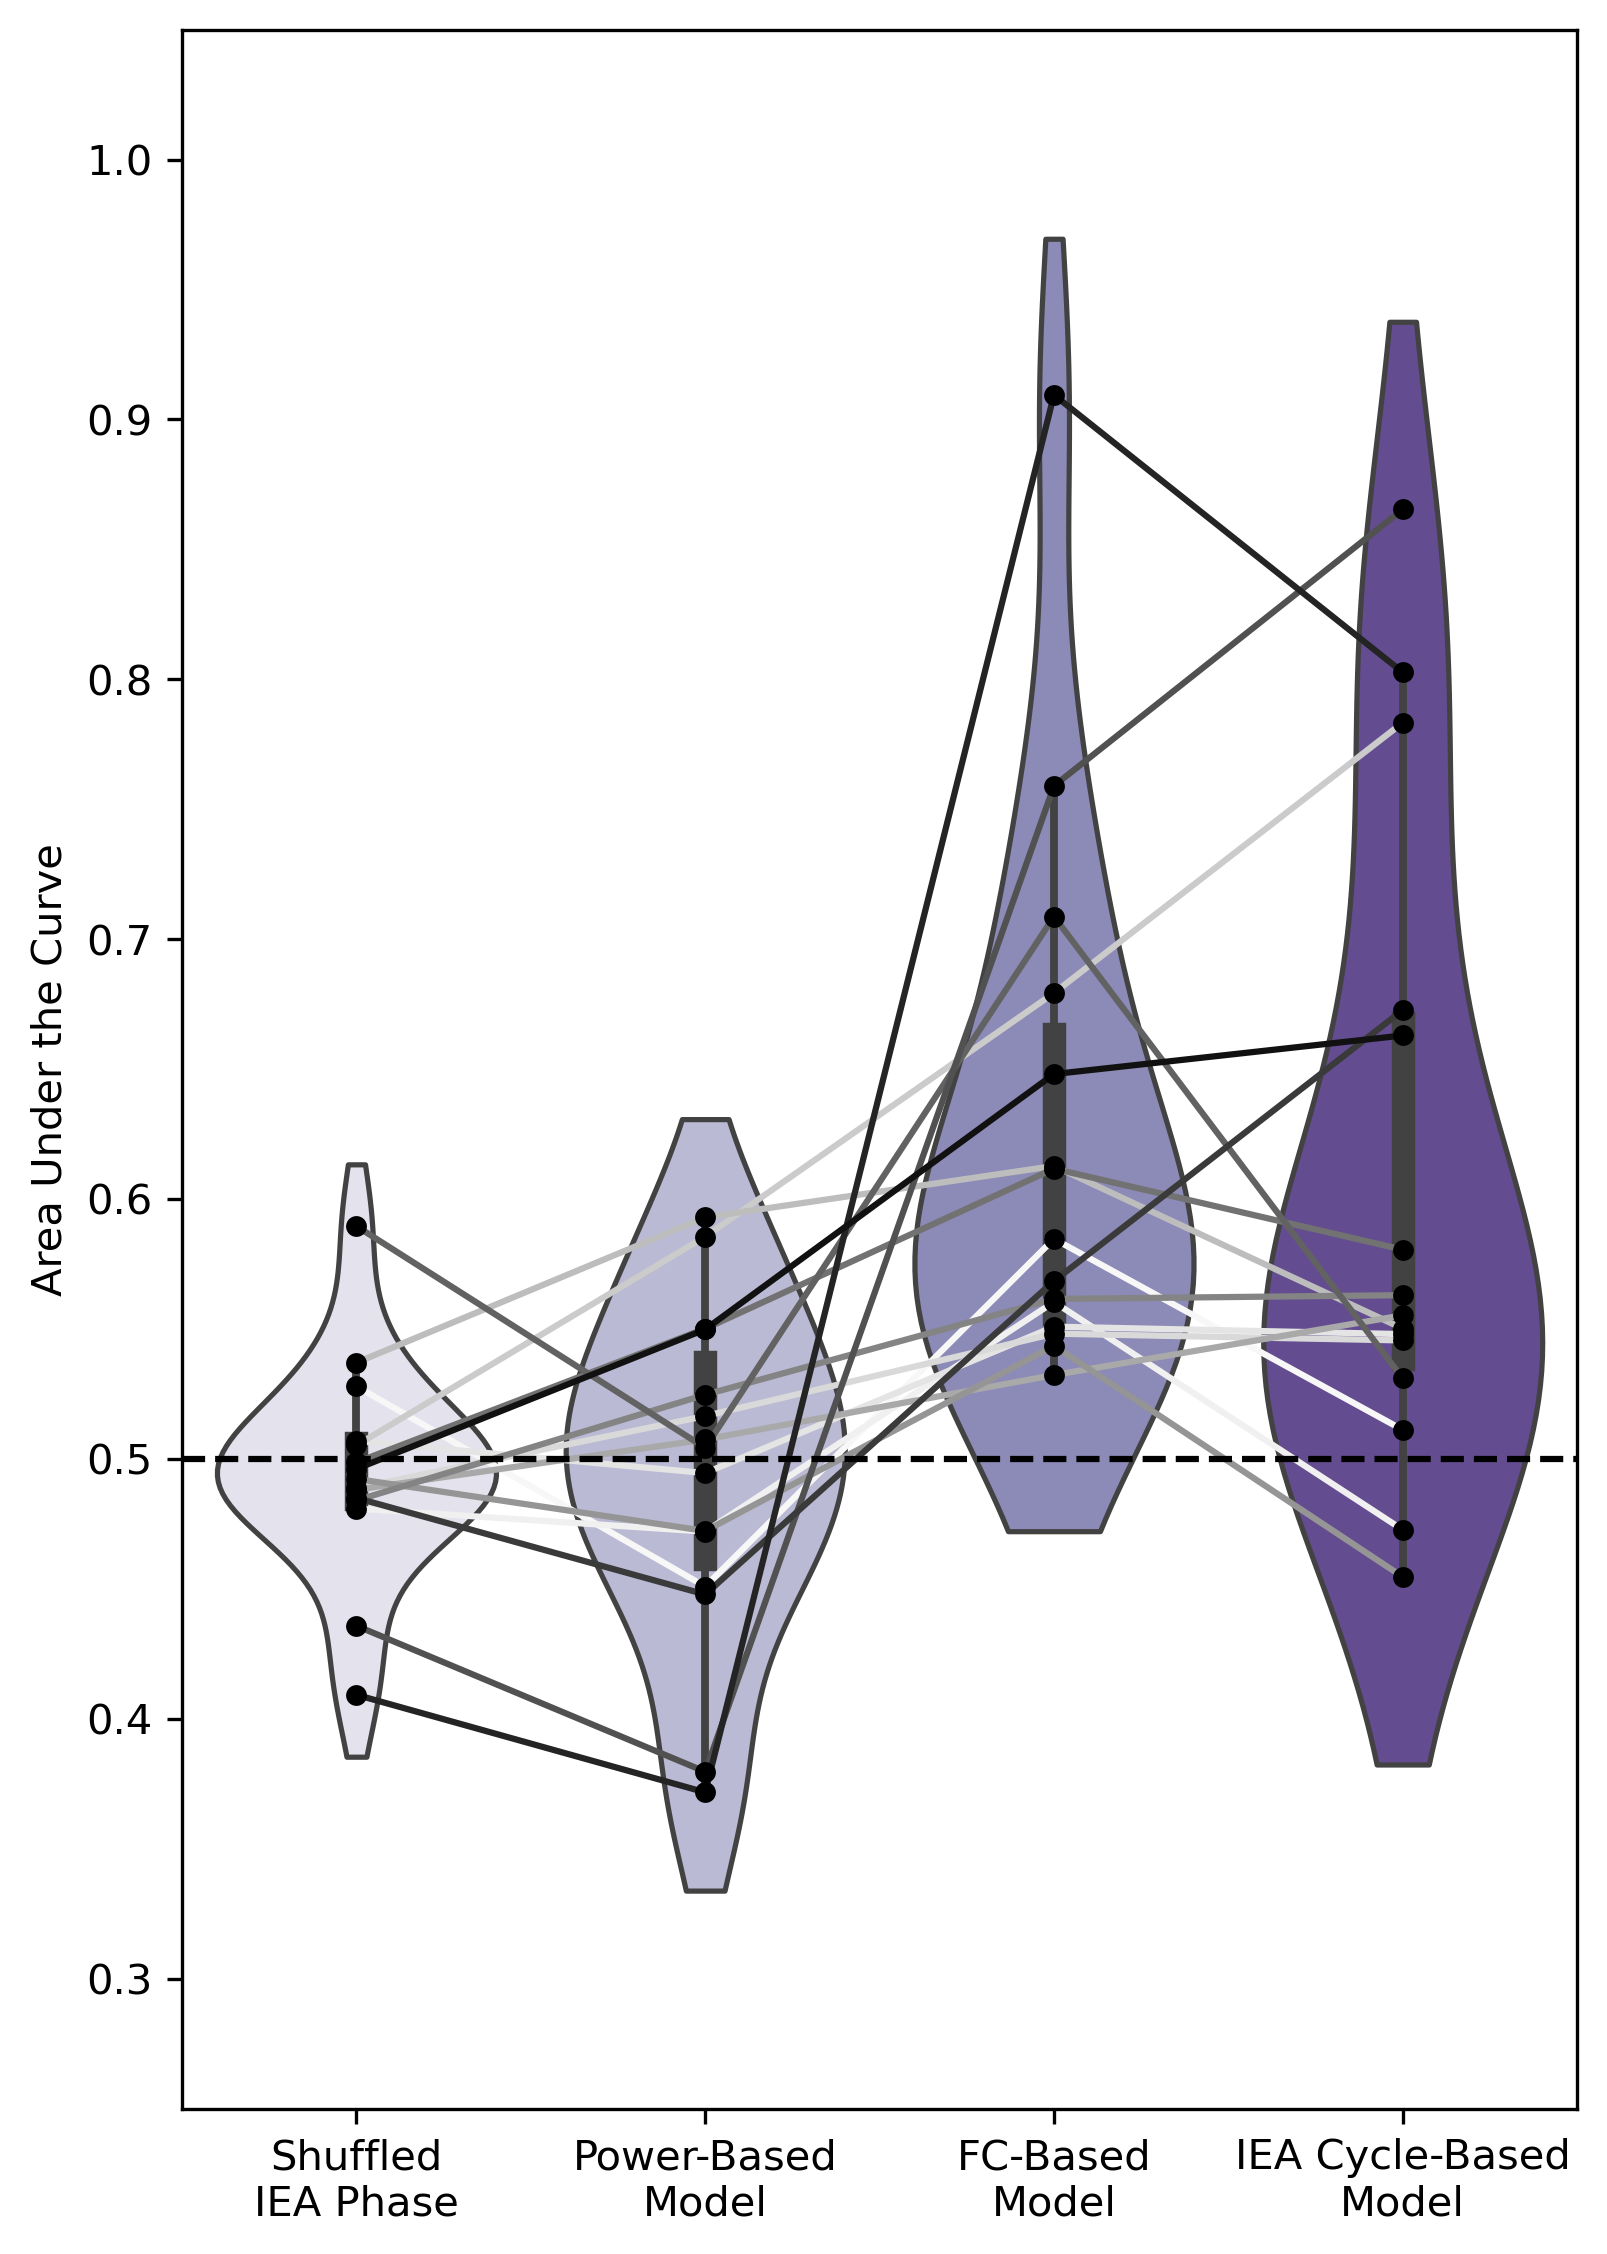

Perm vs Power:  TtestResult(statistic=0.026461515228529128, pvalue=0.9792627211789886, df=14)
Perm vs FC:  TtestResult(statistic=-4.032765266458729, pvalue=0.0012342014959995109, df=14)
Perm vs IEA:  TtestResult(statistic=-2.854222771126189, pvalue=0.012743334860224739, df=14)
FC vs Power:  TtestResult(statistic=3.4942751040939375, pvalue=0.003575659918163757, df=14)
FC vs IEA:  TtestResult(statistic=0.8663830836646762, pvalue=0.40088493724087315, df=14)


In [ ]:
data_fig2c_auc_melted = pd.melt(
    value_vars=[
        "Shuffled IEA Phase",
        "Power-Based Model",
        "FC-Based Model",
        "IEA Cycle-Based Model",
    ],
    id_vars="NP_code",
    var_name="type",
    value_name="AUC",
    frame=data_fig2c_auc,
)

plt.figure(figsize=(6, 9), dpi=300)
ax = plt.subplot(111)
# ax = sns.violinplot(x='type', y='AUC', cut=1, split=False, palette='Purples',
#                     order=['Shuffled IEA Phase', 'Power-Based Model', 'FC-Based Model', 'IEA Cycle-Based Model'],
#                     data=data_fig2c_auc_melted, ax=ax)
ax = sns.violinplot(
    x="type",
    y="AUC",
    hue="type",
    cut=1,
    split=False,
    palette="Purples",
    order=[
        "Shuffled IEA Phase",
        "Power-Based Model",
        "FC-Based Model",
        "IEA Cycle-Based Model",
    ],
    data=data_fig2c_auc_melted,
    ax=ax,
    legend=False,
)
ax = sns.stripplot(
    x="type",
    y="AUC",
    jitter=False,
    color="k",
    order=[
        "Shuffled IEA Phase",
        "Power-Based Model",
        "FC-Based Model",
        "IEA Cycle-Based Model",
    ],
    data=data_fig2c_auc_melted,
    ax=ax,
)
ax = sns.lineplot(
    x="type",
    y="AUC",
    hue="NP_code",
    palette="Greys",
    sort=True,
    data=data_fig2c_auc_melted,
    ax=ax,
)
ax.set_ylabel("Area Under the Curve")
ax.set_xticks(range(4))  # Set tick positions
ax.set_xticklabels(
    [
        "Shuffled\nIEA Phase",
        "Power-Based\nModel",
        "FC-Based\nModel",
        "IEA Cycle-Based\nModel",
    ]
)
ax.set_xlabel("")
ax.legend_.remove()
ax.axhline(0.5, color="k", linestyle="--")
ax.set_xlim([-0.5, 3.5])
ax.set_ylim([0.25, 1.05])
plt.show()

print(
    "Perm vs Power: ",
    sp_stats.ttest_rel(
        data_fig2c_auc["Shuffled IEA Phase"], data_fig2c_auc["Power-Based Model"]
    ),
)
print(
    "Perm vs FC: ",
    sp_stats.ttest_rel(
        data_fig2c_auc["Shuffled IEA Phase"], data_fig2c_auc["FC-Based Model"]
    ),
)
print(
    "Perm vs IEA: ",
    sp_stats.ttest_rel(
        data_fig2c_auc["Shuffled IEA Phase"], data_fig2c_auc["IEA Cycle-Based Model"]
    ),
)
print(
    "FC vs Power: ",
    sp_stats.ttest_rel(
        data_fig2c_auc["FC-Based Model"], data_fig2c_auc["Power-Based Model"]
    ),
)
print(
    "FC vs IEA: ",
    sp_stats.ttest_rel(
        data_fig2c_auc["FC-Based Model"], data_fig2c_auc["IEA Cycle-Based Model"]
    ),
)

## Figure 2d


### Load Source Data


In [ ]:
data_fig2d_ppv = pd.read_csv("../source-data/data-fig2d-ppv.csv")
data_fig2d_npv = pd.read_csv("../source-data/data-fig2d-npv.csv")

### Performance Comparison by Phase


#### Positive Predictive Value


C:\Users\M234724\AppData\Local\Temp\ipykernel_29204\1306213263.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pval_fc = data_fig2d_ppv.groupby(["phase"]).apply(


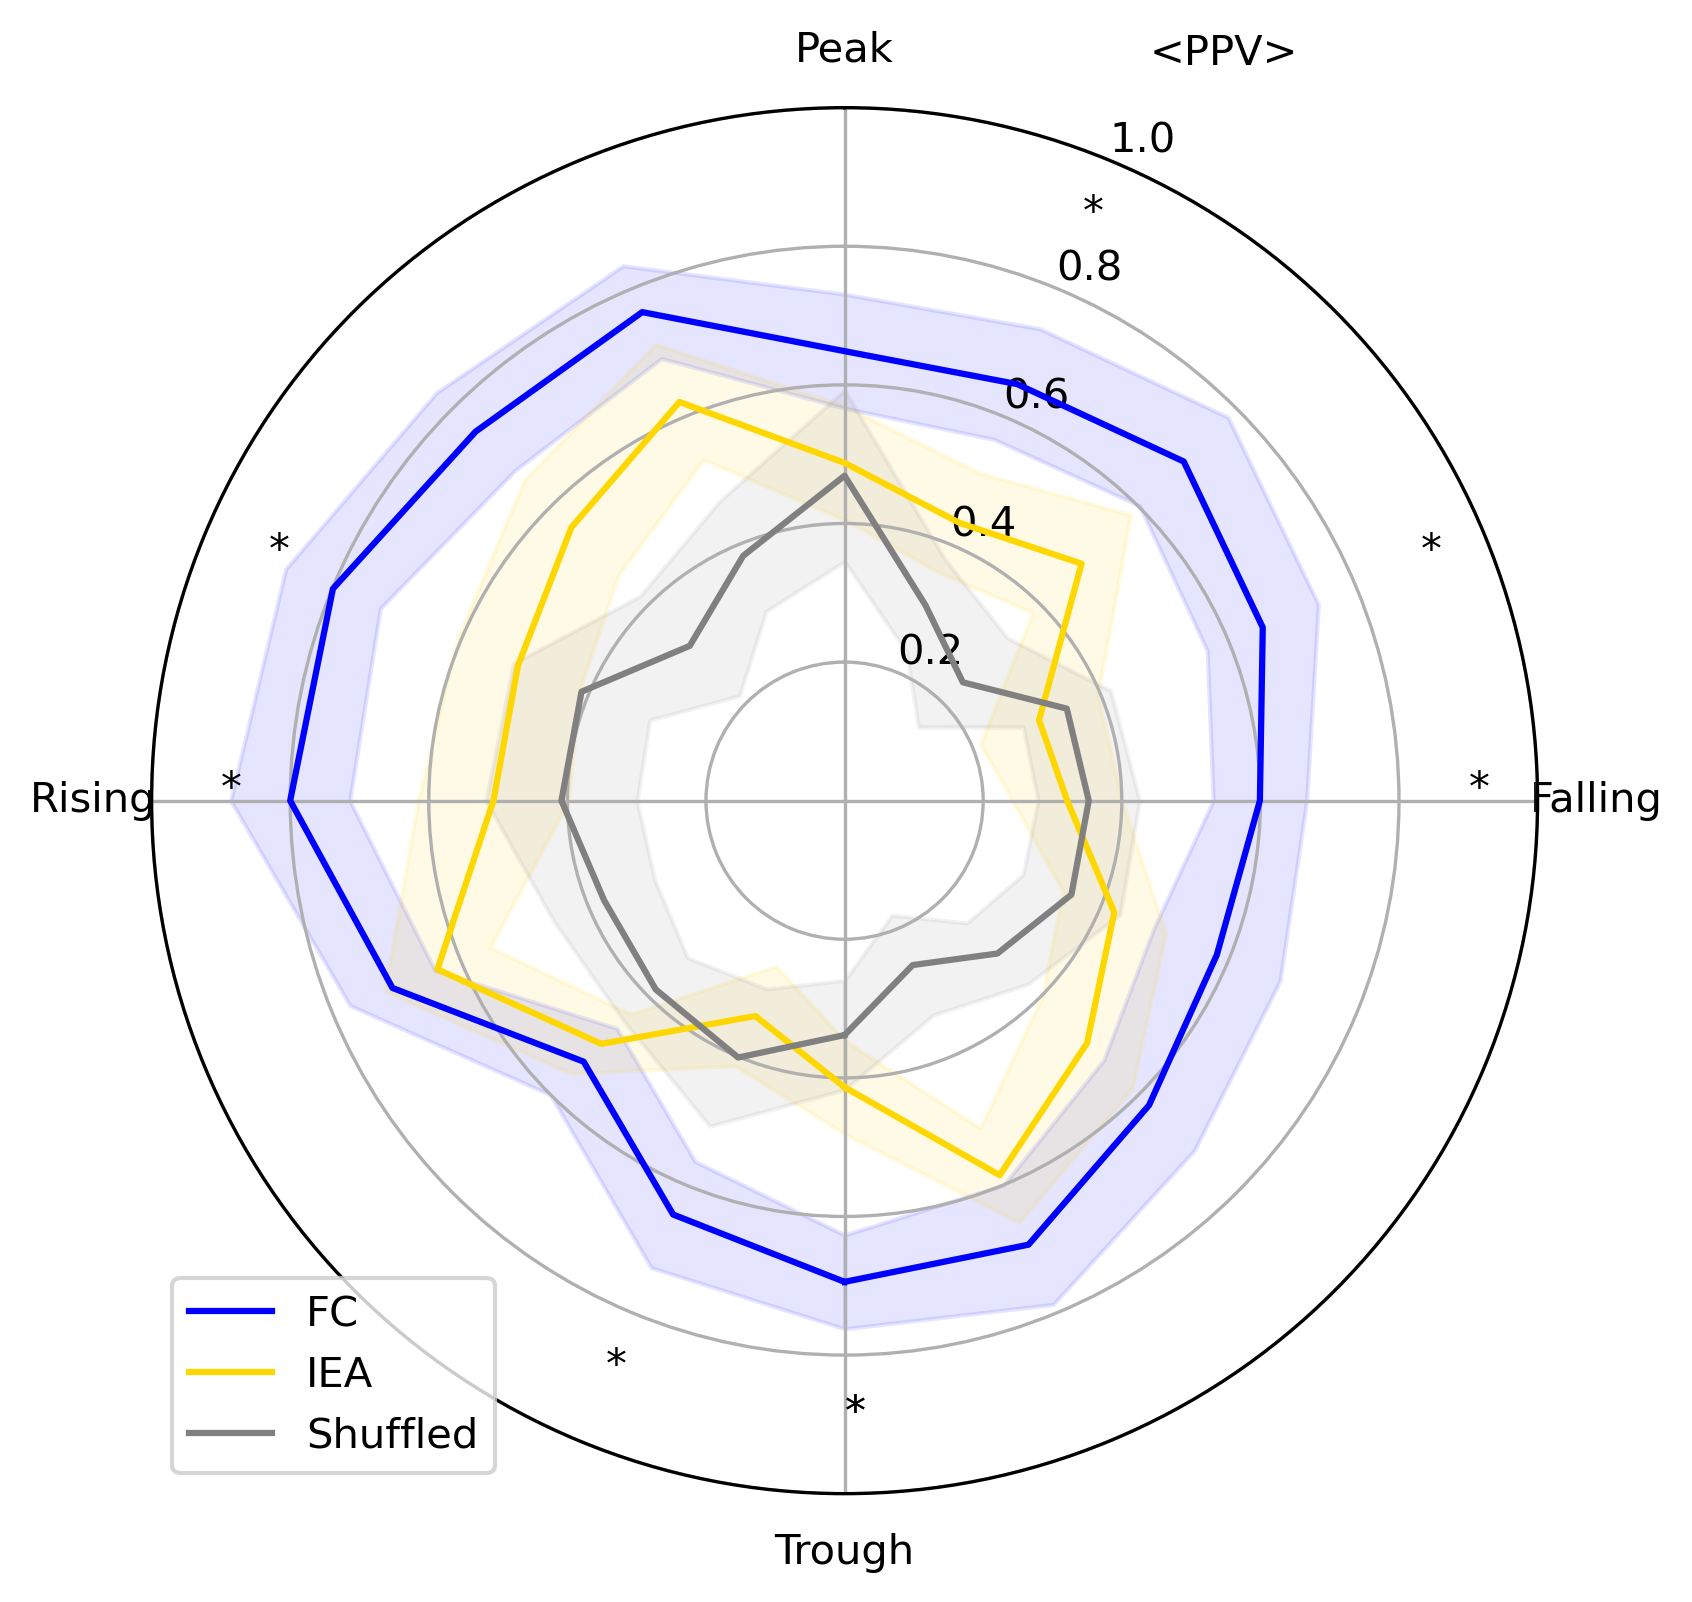

In [20]:
data_fig2d_ppv = data_fig2d_ppv.apply(pd.to_numeric, errors="coerce")
mu = data_fig2d_ppv.groupby(["phase"]).mean()
sd = data_fig2d_ppv.groupby(["phase"]).sem()

pval_fc = data_fig2d_ppv.groupby(["phase"]).apply(
    lambda x: sp_stats.ttest_rel(
        x["FC-Based Model"].values, x["IEA Cycle-Based Model"].values
    )[1]
)
pval_fc = sp_stats.false_discovery_control(pval_fc, method="bh")
plt.figure(figsize=(6, 6), dpi=300)
ax = plt.subplot(111, projection="polar")
ax.plot(mu.index, mu["FC-Based Model"], color="b", label="FC")
ax.fill_between(
    mu.index,
    mu["FC-Based Model"] - sd["FC-Based Model"],
    mu["FC-Based Model"] + sd["FC-Based Model"],
    color="b",
    alpha=0.1,
)
ax.plot(mu.index, mu["IEA Cycle-Based Model"], color="gold", label="IEA")
ax.fill_between(
    mu.index,
    mu["IEA Cycle-Based Model"] - sd["IEA Cycle-Based Model"],
    mu["IEA Cycle-Based Model"] + sd["IEA Cycle-Based Model"],
    color="gold",
    alpha=0.1,
)
ax.plot(mu.index, mu["Shuffled IEA Phase"], color="gray", label="Shuffled")
ax.fill_between(
    mu.index,
    mu["Shuffled IEA Phase"] - sd["Shuffled IEA Phase"],
    mu["Shuffled IEA Phase"] + sd["Shuffled IEA Phase"],
    color="gray",
    alpha=0.1,
)
ax.set_ylim([0.0, 1.0])
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_xticks([0, np.pi / 2, np.pi, 3 * np.pi / 2])
ax.set_xticklabels(["Peak", "Falling", "Trough", "Rising"])
ax.legend(loc="lower left")
for ix in np.flatnonzero(pval_fc < 0.05):
    ax.text(mu.index[ix], 0.9, "*", color="k")
ax.text(np.pi / 8, 1.15, "<PPV>")
plt.show()
pd.DataFrame(np.array([mu.index, pval_fc]).T, columns=["phase", "p-value"]).to_csv(
    "TableS3-PPV.csv"
)

#### Negative Predictive Value


C:\Users\M234724\AppData\Local\Temp\ipykernel_29204\1701177710.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pval_fc = data_fig2d_npv.groupby(["phase"]).apply(


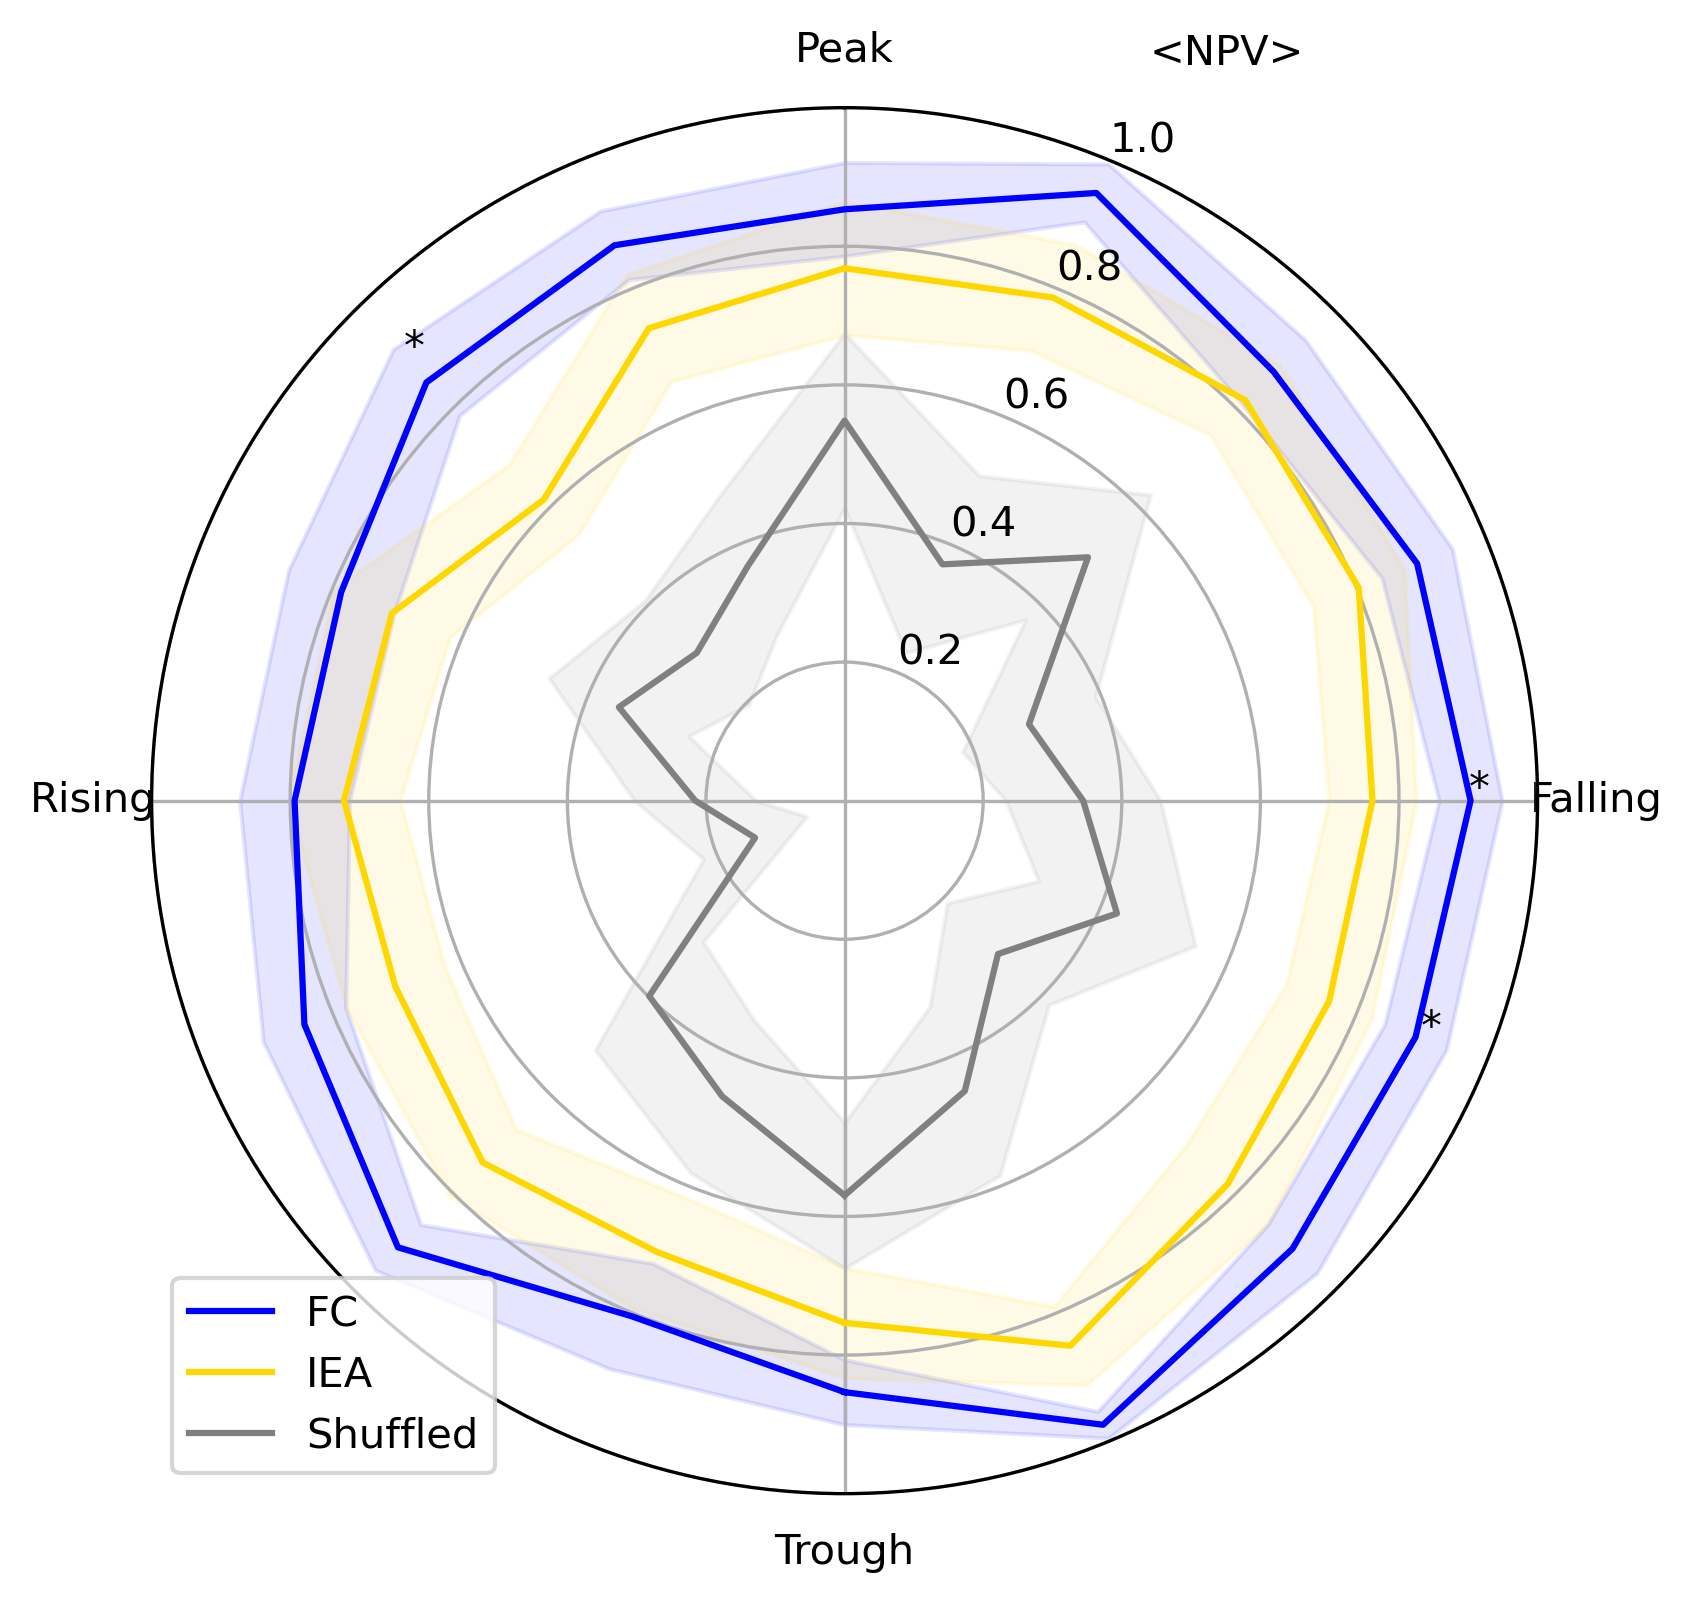

In [21]:
data_fig2d_npv = data_fig2d_npv.apply(pd.to_numeric, errors="coerce")
mu = data_fig2d_npv.groupby(["phase"]).mean()
sd = data_fig2d_npv.groupby(["phase"]).sem()

pval_fc = data_fig2d_npv.groupby(["phase"]).apply(
    lambda x: sp_stats.ttest_rel(
        x["FC-Based Model"].values, x["IEA Cycle-Based Model"].values
    )[1]
)
pval_fc = sp_stats.false_discovery_control(pval_fc, method="bh")

plt.figure(figsize=(6, 6), dpi=300)
ax = plt.subplot(111, projection="polar")

ax.plot(mu.index, mu["FC-Based Model"], color="b", label="FC")
ax.fill_between(
    mu.index,
    mu["FC-Based Model"] - sd["FC-Based Model"],
    mu["FC-Based Model"] + sd["FC-Based Model"],
    color="b",
    alpha=0.1,
)

ax.plot(mu.index, mu["IEA Cycle-Based Model"], color="gold", label="IEA")
ax.fill_between(
    mu.index,
    mu["IEA Cycle-Based Model"] - sd["IEA Cycle-Based Model"],
    mu["IEA Cycle-Based Model"] + sd["IEA Cycle-Based Model"],
    color="gold",
    alpha=0.1,
)

ax.plot(mu.index, mu["Shuffled IEA Phase"], color="gray", label="Shuffled")
ax.fill_between(
    mu.index,
    mu["Shuffled IEA Phase"] - sd["Shuffled IEA Phase"],
    mu["Shuffled IEA Phase"] + sd["Shuffled IEA Phase"],
    color="gray",
    alpha=0.1,
)

ax.set_ylim([0.0, 1.0])
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_xticks([0, np.pi / 2, np.pi, 3 * np.pi / 2])
ax.set_xticklabels(["Peak", "Falling", "Trough", "Rising"])
ax.legend(loc="lower left")
for ix in np.flatnonzero(pval_fc < 0.05):
    ax.text(mu.index[ix], 0.9, "*", color="k")
ax.text(np.pi / 8, 1.15, "<NPV>")
plt.show()

pd.DataFrame(np.array([mu.index, pval_fc]).T, columns=["phase", "p-value"]).to_csv(
    "TableS3-NPV.csv"
)